In [2]:
import torch
import matplotlib.pyplot as plt

In [14]:
checkpoint_path = 'checkpoint_resnet101_NIC_coco_5_cap_per_img_5_min_word_freq.pth.tar'

In [15]:
checkpoint = torch.load(checkpoint_path)
history = checkpoint['history']

In [16]:
# for log in history:
#     print(log)
# # history[-15:]

In [17]:
train_losses, train_accs = [], []
val_losses, val_accs, val_BLEU = [], [], []
for log in history:
    if log.startswith('Epoch:'):
        loss, acc = log.split('Loss ')[1].split('\tTop-5 Accuracy ')
        train_losses.append(float(loss.split()[0]))
        train_accs.append(float(acc.split()[0]))
    if log.startswith('\n * '):
        loss, left = log.split('\n * ')[1].split('LOSS - ')[1].split(', TOP-5 ACCURACY - ')
        acc, bleu = left.split(', BLEU-4 - ')
        bleu = bleu[:-1]
        val_losses.append(float(loss))
        val_accs.append(float(acc))
        val_BLEU.append(float(bleu))        

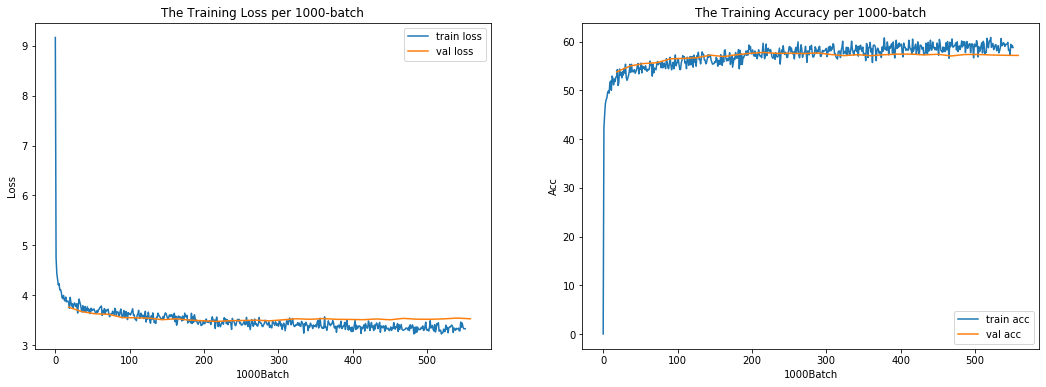

In [18]:
interval = 10
train_loss_batch = train_losses[0:1] + [ sum(train_losses[i*interval+1 :(i+1)*interval+1]) / \
                                        len(train_losses[i*interval+1 :(i+1)*interval+1]) \
                                           for i in range(len(train_losses)//interval)]
train_acc_batch = train_accs[0:1] + [ sum(train_accs[i*interval+1 :(i+1)*interval+1]) /\
                                     len(train_accs[i*interval+1 :(i+1)*interval+1]) \
                                           for i in range(len(train_accs)//interval)]
val_index = list(range(18, len(val_losses)*18+1,18))
final_batches = len(train_loss_batch)
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

axes[0].plot(range(final_batches), train_loss_batch, label = 'train loss')
axes[0].plot(val_index, val_losses, label = 'val loss')
axes[0].set_xlabel('1000Batch') 
axes[0].set_ylabel('Loss')
axes[0].set_title('The Training Loss per 1000-batch')
axes[0].legend()

axes[1].plot(range(final_batches), train_acc_batch, label = 'train acc')
axes[1].plot(val_index, val_accs, label = 'val acc')
axes[1].set_xlabel('1000Batch') 
axes[1].set_ylabel('Acc')
axes[1].set_title('The Training Accuracy per 1000-batch')
axes[1].legend()

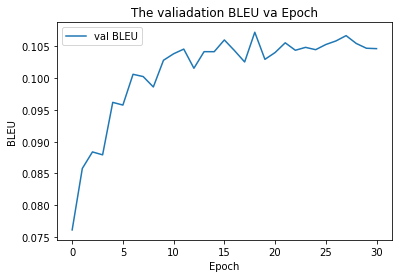

In [19]:
plt.plot(range(len(val_BLEU)), val_BLEU, label = 'val BLEU')
plt.xlabel('Epoch') 
plt.ylabel('BLEU')
plt.title('The valiadation BLEU va Epoch')
plt.legend()